In [41]:
from scipy.stats import mode
from scipy.spatial.distance import pdist
from scipy.cluster.hierarchy import linkage, dendrogram,fcluster
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import silhouette_score
from imblearn.over_sampling import SMOTE,RandomOverSampler
from imblearn.under_sampling import TomekLinks

  CustomerID     I   Iu  Imax         E    PIL          Mb       MbPIL  \
0    17850.0  1707   21    12  4.335643  2.567  156.860294   61.106464   
1    13047.0  1386  105    32  6.503112  2.567  356.232222  138.773752   
2    12583.0  4992  113   360  6.504979  2.752  442.969333  160.962694   
3    13748.0   439   24    80  4.494680  2.567  189.650000   73.880016   
4    15100.0    80    1    32  0.000000  2.567  292.000000  113.751461   

           Mt         TsM  ...       Ts      NbxM      NbxW      MeanD   MaxD  \
0   18.202218  410.250000  ...  5333.25  2.615385  0.641509   0.000000    0.0   
1   18.970947  246.622308  ...  3206.09  0.692308  0.169811  35.000000   70.0   
2   28.764242  511.118462  ...  6644.54  1.153846  0.283019  24.266667   72.0   
3   33.866071   72.942308  ...   948.25  0.384615  0.094340  55.400000  136.0   
4  292.000000   67.384615  ...   876.00  0.230769  0.056604  13.000000   32.0   

   MinD     Etrim    Emonth  Eday_of_week     Ehour  
0   0.0  0.000

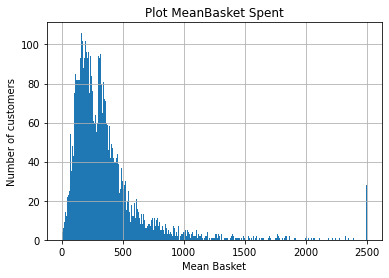

In [42]:
df = pd.read_csv("dataset/CL_Raw-dataset.csv",sep='\t',decimal=",",index_col=0)
print(df.head())
#Drop dei customer generati
df = df[~df.CustomerID.str.contains("N")]

for i in range(len(df)):
    if(df["Mb"].iloc[i]>2500):
        df["Mb"].iloc[i] = 2500

df["Mb"].hist(bins=300)
plt.title("Plot MeanBasket Spent")
plt.xlabel("Mean Basket")
plt.ylabel("Number of customers")
plt.show()
 

In [43]:
print(df["Mb"].mean())
low_value=250
high_value=500
low=len(df[df["Mb"]<low_value])
high=len(df[df["Mb"]>high_value])
print(low) 
print(len(df[(df["Mb"]>=low_value) & (df["Mb"]<=high_value)]))
print(high) 

362.7745381307988
1879
1689
754


In [44]:
def get_label():
     temp = pd.read_csv("dataset/CL_Raw-dataset.csv",sep='\t',decimal=",",index_col=0)
     temp = temp[~temp.CustomerID.str.contains("N")]
     output = []
     for i in range(len(temp)):
          if(df["Mb"].iloc[i]<low_value):
               output.append(0)
          elif(df["Mb"].iloc[i]>high_value):
               output.append(2)
          else:
               output.append(1)

     temp["class"] = output
     return temp

In [45]:
def label(bins=0,label=0):
    df = get_label()
    df[df["class"]==label]["Mb"].hist(bins=bins)
    plt.title("Plot Mean Basket")
    plt.xlabel("Mean Basket")
    plt.ylabel("Number of customers")
    plt.show()

    df[df["class"]==label]["Mb"].plot.box()
    plt.title("Boxplot Mean Basket")
    plt.show()

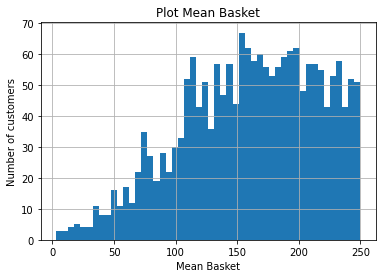

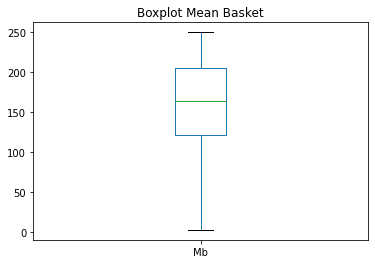

In [19]:
label(bins=50,label=0)

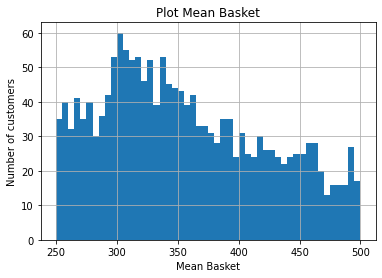

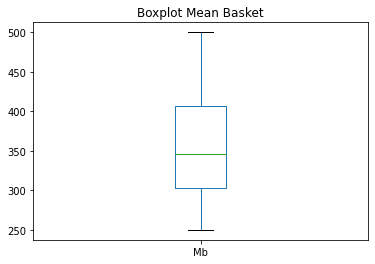

In [20]:
label(bins=50,label=1)

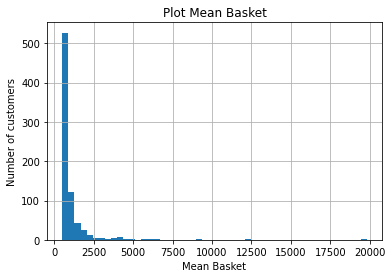

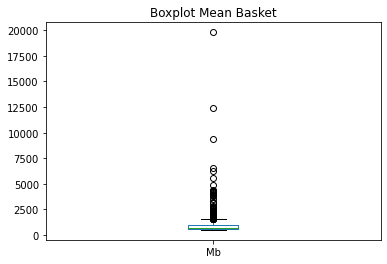

In [21]:
label(bins=50,label=2)

In [49]:
from imblearn.under_sampling import RandomUnderSampler 
def sampling_dataframe(sampling):
    oversampled = get_label()
    oversampled = oversampled.drop(["CustomerID"],axis=1)

    print("Before Len class: 0 "+ str(len(oversampled[oversampled["class"]==0])))
    print("Before Len class: 1 "+ str(len(oversampled[oversampled["class"]==1])))
    print("Before Len class: 2 "+ str(len(oversampled[oversampled["class"]==2])))
    print("---------------------")
    dictionary = {
        0: len(oversampled[oversampled["class"]==0]),
        1: len(oversampled[oversampled["class"]==0]),
        2: len(oversampled[oversampled["class"]==0])
    }
    sm = SMOTE(sampling_strategy=dictionary,random_state=42 )
    X = oversampled.drop(columns=["class"],axis=1)
    X_res, y_res = sm.fit_resample(X, oversampled["class"])
    oversampled = pd.DataFrame(X_res)
    oversampled["class"] = y_res
    '''
    dictionary = {
        0: len(oversampled[oversampled["class"]==2]),
        1: len(oversampled[oversampled["class"]==2]),
        2: len(oversampled[oversampled["class"]==2])
    }
    tl = RandomUnderSampler()
    X = oversampled.drop(columns=["class"],axis=1)
    X_res, y_res = tl.fit_resample(X, oversampled["class"])
    oversampled = pd.DataFrame(X_res)
    oversampled["class"] = y_res
    '''
    print("After Len class: 0 "+ str(len(oversampled[oversampled["class"]==0])))
    print("After Len class: 1 "+ str(len(oversampled[oversampled["class"]==1])))
    print("After Len class: 2 "+ str(len(oversampled[oversampled["class"]==2])))
    print("---------------------------------------------------------------")
    
    return oversampled

In [50]:
print("Oversampling the dataset")
result = sampling_dataframe(sampling="over")

Oversampling the dataset
Before Len class: 0 1879
Before Len class: 1 1689
Before Len class: 2 754
---------------------
After Len class: 0 1879
After Len class: 1 1879
After Len class: 2 1879
---------------------------------------------------------------


In [51]:
result.head()

,I,Iu,Imax,E,PIL,Mb,MbPIL,Mt,TsM,TsW,...,NbxM,NbxW,MeanD,MaxD,MinD,Etrim,Emonth,Eday_of_week,Ehour,class
0,1707,21,12,4.335643,2.567,156.860294,61.106464,18.202218,410.250000,100.627358,...,2.615385,0.641509,0.000000,0.0,0.0,0.000000,0.000000,0.845790,2.716384,0
1,1386,105,32,6.503112,2.567,356.232222,138.773752,18.970947,246.622308,60.492264,...,0.692308,0.169811,35.000000,70.0,0.0,2.226424,2.774573,1.942764,2.070516,1
2,4992,113,360,6.504979,2.752,442.969333,160.962694,28.764242,511.118462,125.368679,...,1.153846,0.283019,24.266667,72.0,0.0,2.235084,3.264252,2.396410,2.395911,1
3,439,24,80,4.494680,2.567,189.650000,73.880016,33.866071,72.942308,17.891509,...,0.384615,0.094340,55.400000,136.0,0.0,1.177965,1.177965,1.177965,1.378783,0
4,80,1,32,0.000000,2.567,292.000000,113.751461,292.000000,67.384615,16.528302,...,0.230769,0.056604,13.000000,32.0,0.0,0.918296,0.918296,0.918296,1.584963,1


In [52]:
result = result.drop(columns=["I","Iu","Ts","MaxD","MinD","Mb","MbPIL","TsM","NbxM","Etrim","Emonth","Ehour"])
print(result.head())
print(len(result))

   Imax         E    PIL          Mt         TsW      NbxW      MeanD  \
0    12  4.335643  2.567   18.202218  100.627358  0.641509   0.000000   
1    32  6.503112  2.567   18.970947   60.492264  0.169811  35.000000   
2   360  6.504979  2.752   28.764242  125.368679  0.283019  24.266667   
3    80  4.494680  2.567   33.866071   17.891509  0.094340  55.400000   
4    32  0.000000  2.567  292.000000   16.528302  0.056604  13.000000   

   Eday_of_week  class  
0      0.845790      0  
1      1.942764      1  
2      2.396410      1  
3      1.177965      0  
4      0.918296      1  
5637


In [53]:
result.to_csv('dataset/CL_over-dataset.csv', sep='\t', index=True, decimal=",")